In [1]:
import pandas as pd

In [224]:
import time

In [228]:
s=time.time()
print(1)
e=time.time()
print(e-s)

1
0.007977724075317383


In [226]:
s

1564457120.4350271

In [30]:
genelist = pd.read_csv('data/symbol_nodes.csv', sep='\t', header=None)
hgncFile = pd.read_csv('E:/wx/2019上课题/数据/hgnc_complete_set.txt', sep='\t',
                           usecols=['symbol', 'ensembl_gene_id', ],
                           engine='python')
symbol2ensg = hgncFile.loc[hgncFile['symbol'].isin(genelist[0])]

In [31]:
ensemblid = pd.read_csv('E:/wx/2019上课题/数据/exp/TCGA-ACC.htseq_fpkm-uq.tsv', sep='\t', usecols=['Ensembl_ID'], engine='python')
ensemblid['id'] = ensemblid['Ensembl_ID'].apply(lambda x: x.split('.')[0])

In [32]:
symbol2ensg = symbol2ensg.drop_duplicates(['ensembl_gene_id'], keep=False)

In [33]:
enseid_list = set(symbol2ensg['ensembl_gene_id']) & set(ensemblid['id'])

In [37]:
symbol2ensg = symbol2ensg.loc[symbol2ensg['ensembl_gene_id'].isin(enseid_list)]

In [55]:
symbol2ensg['ensembl_gene_version'] = symbol2ensg['ensembl_gene_id'].map(dict(zip(ensemblid['id'], ensemblid['Ensembl_ID'])))

In [7]:
mss1 = symbol2ensg.loc[symbol2ensg.isna()['ensembl_gene_id']]

In [8]:
mss1.shape

(12, 2)

In [113]:
import mygene
mg = mygene.MyGeneInfo()

In [114]:
ensg = mg.querymany(list(mss1['symbol']), scopes='symbol', fields='ensembl.gene', species='human',returnall=True)

querying 1-12...done.
Finished.


In [115]:
mapdict = {}
for item in ensg['out'][1:12]:
    mapdict[item['query']] = item['ensembl']['gene']
maplist = [mapdict[key] for key in mss1['symbol'][1:12]]
maplist

['ENSG00000125726',
 'ENSG00000130520',
 'ENSG00000131408',
 'ENSG00000176294',
 'ENSG00000188000',
 'ENSG00000237521',
 'ENSG00000284723',
 'ENSG00000186723',
 'ENSG00000080511',
 'ENSG00000176170',
 'ENSG00000128016']

In [116]:
symbol2ensg_copy = symbol2ensg.copy(deep=True)
symbol2ensg_copy.loc[symbol2ensg_copy['ensembl_gene_id'].duplicated(), 'ensembl_gene_id'] = maplist

In [89]:
genelist = pd.read_csv('data/symbol_nodes.csv', sep='\t', header=None)
hgncFile = pd.read_csv('E:/wx/2019上课题/数据/hgnc_complete_set.txt', sep='\t',
                           usecols=['symbol', 'ensembl_gene_id', ],
                           engine='python')
symbol2ensg = hgncFile.loc[hgncFile['symbol'].isin(genelist[0])]

In [95]:
exp_list = []
ensembl_list = list(symbol2ensg['ensembl_gene_id'])
with open('E:/wx/2019上课题/数据/exp/TCGA-BRCA.htseq_fpkm-uq.tsv', 'r') as file:
    headerline = file.readline().split('\t')
    for f in file.readlines():
        enseID = f.split('\t')
        ensgid = enseID[0].split('.')[0]
        if ensgid in ensembl_list:
            symbolname = symbol2ensg.loc[symbol2ensg['ensembl_gene_id']==ensgid, 'symbol'].values[0]
            tmp = enseID[1:]
            tmp.insert(0, str(symbolname))
            exp_list.append(tmp)

In [96]:
exp_mat = pd.DataFrame(exp_list, columns=headerline)
exp_mat = exp_mat.set_index(exp_mat['Ensembl_ID']).drop(['Ensembl_ID'], axis = 1).astype('float')

In [100]:
import seaborn as sns

In [99]:
exp_mat.head()

,TCGA-3C-AAAU-01A,TCGA-3C-AALI-01A,TCGA-3C-AALJ-01A,TCGA-3C-AALK-01A,TCGA-4H-AAAK-01A,TCGA-5L-AAT0-01A,TCGA-5L-AAT1-01A,TCGA-5T-A9QA-01A,TCGA-A1-A0SB-01A,TCGA-A1-A0SD-01A,...,TCGA-UL-AAZ6-01A,TCGA-UU-A93S-01A,TCGA-V7-A7HQ-01A,TCGA-W8-A86G-01A,TCGA-WT-AB41-01A,TCGA-WT-AB44-01A,TCGA-XX-A899-01A,TCGA-XX-A89A-01A,TCGA-Z7-A8R5-01A,TCGA-Z7-A8R6-01A
Ensembl_ID,,,,,,,,,,,,,,,,,,,,,
DNAH3,6.180763,13.927458,6.065811,9.382609,6.517539,9.078796,11.012898,6.929496,6.940320,8.769128,...,9.910631,8.602392,10.679208,8.325847,6.943584,5.950081,8.437941,10.724569,7.772111,10.365382
RPL23A,21.411591,22.256283,22.578371,22.051360,21.983819,22.058780,22.181517,21.854779,22.413392,21.253195,...,22.799815,21.372169,23.404803,21.575578,23.669814,22.011333,21.758682,21.153371,22.878455,21.917036
PIGV,17.349390,17.268235,16.374166,17.382515,17.075935,17.400439,16.728531,17.293203,16.922321,16.941512,...,16.785425,16.643855,17.834723,17.652379,17.093795,16.559571,16.500564,16.444754,17.491112,16.565581
ZNF708,15.838546,15.157698,15.129867,15.569717,16.280461,15.598933,15.127871,14.790749,16.358455,15.523293,...,14.157077,14.794624,13.189882,15.377946,13.140547,14.815088,15.185217,15.813685,15.434067,14.650084
MOGAT2,11.185038,8.096404,9.899379,14.824432,11.093087,14.348452,12.781272,9.510313,12.174911,13.571437,...,10.136139,16.471641,10.170766,13.772138,12.593160,13.138023,12.716589,12.849747,15.659295,11.041851


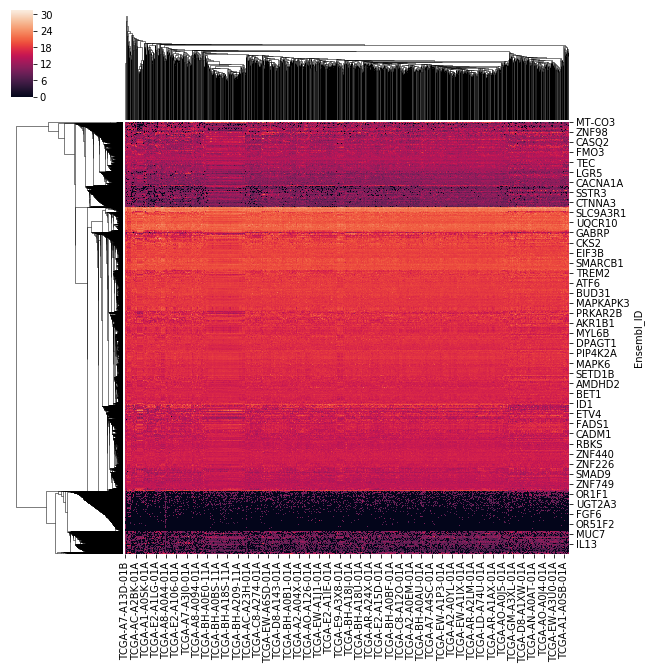

In [101]:
sns.clustermap(exp_mat)

In [106]:
# 获取样本标签
list(exp_mat.columns)

['TCGA-3C-AAAU-01A',
 'TCGA-3C-AALI-01A',
 'TCGA-3C-AALJ-01A',
 'TCGA-3C-AALK-01A',
 'TCGA-4H-AAAK-01A',
 'TCGA-5L-AAT0-01A',
 'TCGA-5L-AAT1-01A',
 'TCGA-5T-A9QA-01A',
 'TCGA-A1-A0SB-01A',
 'TCGA-A1-A0SD-01A',
 'TCGA-A1-A0SE-01A',
 'TCGA-A1-A0SF-01A',
 'TCGA-A1-A0SG-01A',
 'TCGA-A1-A0SH-01A',
 'TCGA-A1-A0SI-01A',
 'TCGA-A1-A0SJ-01A',
 'TCGA-A1-A0SK-01A',
 'TCGA-A1-A0SM-01A',
 'TCGA-A1-A0SN-01A',
 'TCGA-A1-A0SO-01A',
 'TCGA-A1-A0SP-01A',
 'TCGA-A1-A0SQ-01A',
 'TCGA-A2-A04N-01A',
 'TCGA-A2-A04P-01A',
 'TCGA-A2-A04Q-01A',
 'TCGA-A2-A04R-01A',
 'TCGA-A2-A04T-01A',
 'TCGA-A2-A04U-01A',
 'TCGA-A2-A04V-01A',
 'TCGA-A2-A04W-01A',
 'TCGA-A2-A04X-01A',
 'TCGA-A2-A04Y-01A',
 'TCGA-A2-A0CK-01A',
 'TCGA-A2-A0CL-01A',
 'TCGA-A2-A0CM-01A',
 'TCGA-A2-A0CO-01A',
 'TCGA-A2-A0CP-01A',
 'TCGA-A2-A0CQ-01A',
 'TCGA-A2-A0CR-01A',
 'TCGA-A2-A0CS-01A',
 'TCGA-A2-A0CT-01A',
 'TCGA-A2-A0CU-01A',
 'TCGA-A2-A0CV-01A',
 'TCGA-A2-A0CW-01A',
 'TCGA-A2-A0CX-01A',
 'TCGA-A2-A0CY-01A',
 'TCGA-A2-A0CZ-01A',
 'TCGA-A2-A0D

In [184]:
samples = list(exp_mat.columns)
case_samples = []
control_samples = []
for i in samples:
    if int(i.strip()[-3:-2]) == 0:
        case_samples.append(i)
    else:
        control_samples.append(i)

labels = [[1, 0][int(i.strip()[-3:-2])] for i in samples]
sample_label_dict = dict(zip(samples, labels))

In [165]:
case_num = len(case_samples)
control_num = len(control_samples)

In [142]:
p = 0.8

In [146]:
train_num_case = int(case * p)
train_num_control = int(control * p)

In [147]:
import random

In [195]:
train_x_samples = random.sample(case_samples, train_num_case)
train_x_samples.extend(random.sample(control_samples, train_num_control))
random.shuffle(train_x_samples)
train_x = exp_mat[train_x_samples]

,TCGA-AC-A2FE-01A,TCGA-A2-A0EM-01A,TCGA-A8-A0A4-01A,TCGA-AN-A0FJ-01A,TCGA-D8-A1JS-01A,TCGA-A8-A07W-01A,TCGA-B6-A1KF-01A,TCGA-E9-A1RG-01A,TCGA-C8-A27A-01A,TCGA-A7-A13G-11A,...,TCGA-AR-A0TY-01A,TCGA-A7-A2KD-01A,TCGA-A2-A04T-01A,TCGA-E2-A10C-01A,TCGA-E9-A229-01A,TCGA-BH-A0BD-01A,TCGA-D8-A1XU-01A,TCGA-EW-A1PA-01A,TCGA-C8-A273-01A,TCGA-D8-A1JG-01B
Ensembl_ID,,,,,,,,,,,,,,,,,,,,,
DNAH3,7.737017,6.667348,9.700430,7.724528,4.699945,7.799009,6.695633,10.711074,8.244306,9.173051,...,7.309370,11.207111,8.586239,12.255056,9.953270,8.577710,13.804726,8.284302,6.988051,8.545514
RPL23A,21.315073,21.660965,21.794714,21.711891,22.620186,21.227378,21.997026,22.199576,21.361801,21.731750,...,21.234696,21.273985,21.687081,21.466463,21.280935,21.279176,20.923124,20.393705,22.491036,20.468547
PIGV,16.481266,17.502156,17.511404,16.319019,17.980185,16.780669,17.368559,17.428273,17.166071,17.363233,...,16.974570,17.422191,15.996791,16.627851,17.187587,16.946788,16.702475,17.546887,17.764463,16.727047
ZNF708,14.866407,15.005213,15.726925,15.911489,15.906113,14.580209,14.756688,13.945713,15.901906,15.323414,...,15.919666,14.971556,14.226267,15.724878,16.057596,14.984254,15.749049,15.741451,14.369314,17.184071
MOGAT2,10.510983,15.323858,13.989180,7.258968,12.667245,8.649868,17.539163,14.007664,11.538566,11.632442,...,10.806884,9.488276,15.691293,14.575908,11.909038,18.315716,15.840903,15.765717,10.946606,17.325586


In [211]:
train_y = [sample_label_dict[y] for y in train_x_samples]

In [196]:
test_x_samples = list(set(samples) - set(train_x_samples))
random.shuffle(test_x_samples)
test_x = exp_mat[test_x_samples]

In [212]:
test_y = [sample_label_dict[y] for y in test_x_samples]

In [218]:
from loadNetParams import *
from models import *
from mxnet.gluon.loss import SigmoidBinaryCrossEntropyLoss
from mxnet.gluon.trainer import Trainer
from mxnet import autograd
import mxnet.ndarray as nd

In [219]:
dataset = LoadData()
net, feature = train_model(dataset)
net.initialize(Uniform(1))
cross_entropy = SigmoidBinaryCrossEntropyLoss(from_sigmoid=True)
trainer = Trainer(net.collect_params(), 'sgd', {'learning_rate': 0.001, 'momentum': 1})

加载ppi网络数据...
加载蛋白与entry对应关系数据...
加载entry网络...
加载entry与pathway对应关系数据...
加载pathway网络数据...
构建神经网络模型...


In [220]:
epochs = len(train_x_samples)
for i in range(epochs):
    if i % 100 == 0:
        print(i)
    with autograd.record():
        x = nd.array(train_x[train_x_samples[i]]).reshape(train_x.shape[0],1)
        preds = net(x)
        loss = cross_entropy(preds, nd.array(train_y[train_y[i]]))
    loss.backward()
    trainer.step(1)

0


MXNetError: [17:58:46] c:\jenkins\workspace\mxnet-tag\mxnet\src\operator\tensor\./elemwise_binary_broadcast_op.h:68: Check failed: l == 1 || r == 1 operands could not be broadcast together with shapes [334,1] [333,1]

In [223]:
train_x.ix[0]

d:\python36\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


TCGA-AC-A2FE-01A       7.737017
TCGA-A2-A0EM-01A       6.667348
TCGA-A8-A0A4-01A       9.700430
TCGA-AN-A0FJ-01A       7.724528
TCGA-D8-A1JS-01A       4.699945
TCGA-A8-A07W-01A       7.799009
TCGA-B6-A1KF-01A       6.695633
TCGA-E9-A1RG-01A      10.711074
TCGA-C8-A27A-01A       8.244306
TCGA-A7-A13G-11A       9.173051
TCGA-B6-A0RH-01A      10.070529
TCGA-A8-A079-01A       5.629096
TCGA-A7-A13F-01A       0.000000
TCGA-E9-A1NH-01A       8.521697
TCGA-E9-A1N9-11A       8.876784
TCGA-E2-A1B5-01A       7.867460
TCGA-E2-A155-01A       6.669904
TCGA-A8-A09Q-01A       7.948968
TCGA-E9-A1RF-11A       9.541854
TCGA-BH-A0C3-01A       8.947741
TCGA-BH-A1ES-01A       9.704794
TCGA-E2-A1IE-01A       6.703518
TCGA-A8-A08L-01A       8.300663
TCGA-E2-A14V-01A       9.886889
TCGA-AO-A1KQ-01A       9.612156
TCGA-BH-A18J-11A       9.365721
TCGA-E2-A15P-01A       9.940769
TCGA-Z7-A8R6-01A\n    10.365382
TCGA-AR-A1AR-01A       6.109358
TCGA-AO-A0JE-01A       9.886633
                        ...    
TCGA-LL-